<a href="https://colab.research.google.com/github/adutta96oct/ml-notebooks/blob/master/pass_fail_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>


In [1]:
#All required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [3]:
data = pd.read_csv("/content/DMV_Written_Tests.csv")
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
scores = data[["DMV_Test_1", "DMV_Test_2"]].values
results = data[["Results"]].values

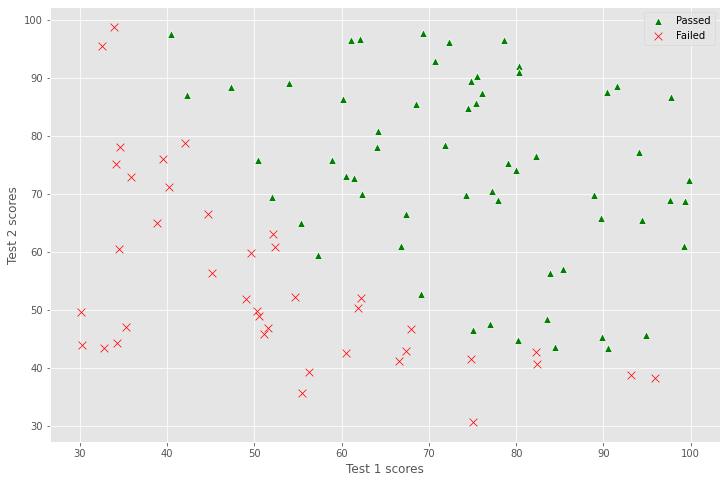

In [5]:
passed = (results == 1).reshape(100,1)
failed = (results == 0).reshape(100,1)
passed
ax = sns.scatterplot(x=scores[passed[:,0],0],
                     y=scores[passed[:,0],1],
                     color="green",
                     marker="^",
                     s=60)
sns.scatterplot(x=scores[failed[:,0],0],
                y=scores[failed[:,0],1],
                color="red",
                marker="x",
                s=60)
ax.legend(["Passed", "Failed"])
ax.set(xlabel="Test 1 scores", ylabel= "Test 2 scores")
plt.show()

Define the sigmoid function $\sigma(z)$

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

In [6]:
def logistic_function(z):
  return 1/(1+np.exp(-z))

<b>Define cost function:</b> 

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [7]:
def compute_cost(theta,x,y):
    m = len(y)
    y_pred = logistic_function(np.dot(x,theta))
    error = (y * np.log(y_pred)) + (1-y)*np.log(1 - y_pred)
    cost = -1/m * sum(error)
    gradient = 1/m * np.dot(x.transpose(),(y_pred - y))
    return cost[0], gradient

**Cost and Gradient at Initialization**

In [8]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores)/std_scores

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows,1)), scores, axis=1)
y = results.reshape(rows,1)

theta_init = np.zeros((cols + 1,1))
cost, gradient = compute_cost(theta_init,X,y)

**Gradient Descent**

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [9]:
def gradient_descent(x,y,theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta,x,y)
        theta -=(alpha*gradient)
        costs.append(cost)
    return theta, costs

In [10]:
theta, costs = gradient_descent(X,y,theta_init,1, 200)

In [11]:
print('Theta after running gradient descent: ',theta)
print("Resulting cost: ",costs)

Theta after running gradient descent:  [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting cost:  [0.693147180559946, 0.559403242545655, 0.4805876648533871, 0.43046342235936136, 0.39605647005498307, 0.3709669278894235, 0.35181143821554683, 0.3366625823479169, 0.3243484792498155, 0.31411698799771753, 0.3054632898746155, 0.2980357306412133, 0.29158158307561594, 0.2859143408821499, 0.2808932044202074, 0.2764097679797487, 0.2723791206465763, 0.2687337409240406, 0.2654192108626502, 0.2623911455046634, 0.2596129525785907, 0.2570541709629098, 0.2546892200293839, 0.25249644553195266, 0.2504573827607223, 0.24855618107480806, 0.24677914982076546, 0.2451143966177867, 0.24355153668345655, 0.24208145734126266, 0.24069612578706717, 0.23938843105923613, 0.2381520532694504, 0.23698135472344695, 0.2358712887425202, 0.23481732289271778, 0.23381537401406843, 0.2328617529706419, 0.23195311745280278, 0.23108643148423902, 0.23025893053940155, 0.2294680913776006, 0.2287116058600059, 0.2279873581441674, 0.22

**Plotting Convergence of $J(\theta)$**

Text(0.5, 1.0, 'Values of cost Function over Iterations of Gradient Descent')

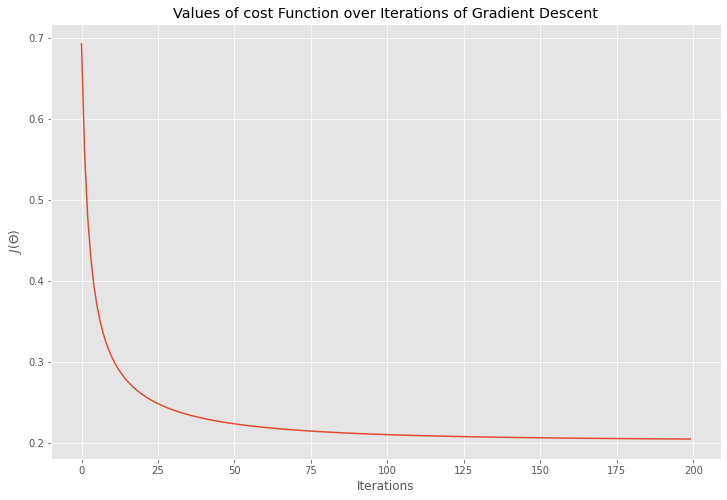

In [12]:
    plt.plot(costs)
    plt.xlabel("Iterations")
    plt.ylabel("$J(\Theta)$")
    plt.title("Values of cost Function over Iterations of Gradient Descent")

**Plotting the decision boundary**

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

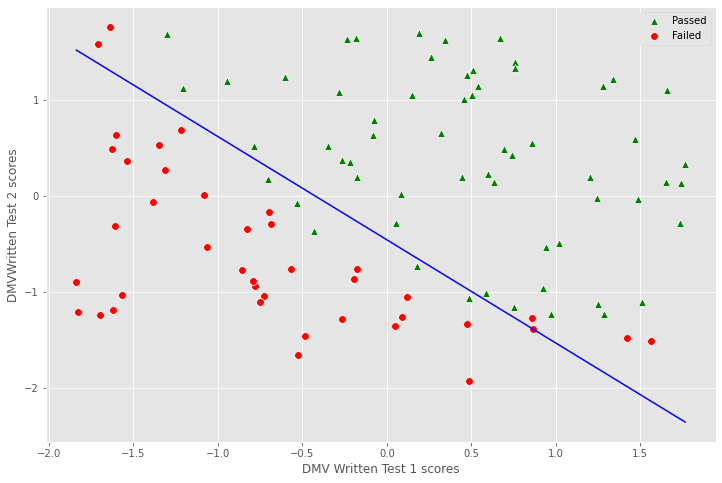

In [13]:
ax = sns.scatterplot(x = X[passed[:,0],1],
                    y = X[passed[:,0],2],
                    marker = "^",
                    color = "green",
                    s=60)
sns.scatterplot(x = X[failed[:,0],1],
               y = X[failed[:,0],2],
               color = 'red',
               s=60)

ax.legend(['Passed', 'Failed'])
ax.set(xlabel="DMV Written Test 1 scores", ylabel= "DMVWritten Test 2 scores")

x_boundary = np.array([np.min(X[:,1]),np.max(X[:,1])])
y_boundary = -(theta[0] + theta[1] * x_boundary)/theta[2]

sns.lineplot(x=x_boundary, y=y_boundary, color='blue', )
plt.show()

**Predictions using the optimized $\theta$ values**


$h_\theta(x) = x\theta$

In [14]:
def predict(theta, x):
    results = x.dot(theta)
    return results > 0

In [15]:
p = predict(theta, X)
print("Training Accuracy: ", sum(p==y)[0],"%")

Training Accuracy:  89 %


In [16]:
test = np.array([50,70])
test = (test - mean_scores) / std_scores
test = np.append(np.ones(1),test)
probability = logistic_function(test.dot(theta))
print("A person who scores 50 and 70 on their DMV written tests have a", 
     np.round(probability[0], 2), "probability of passing")

A person who scores 50 and 70 on their DMV written tests have a 0.34 probability of passing
